## Voting Data

### Description of what notebook does

### source of data 
* e.g. link and description

### Setup

In [53]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcol

import seaborn as sns
import numpy as np

### Load data

In [2]:
election_data_df=pd.read_csv("../data/2020_election.csv")
election_data_df.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631
3,Alabama,1007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280
4,Alabama,1009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022


In [3]:
print(election_data_df.shape)

(3152, 10)


2020_election.csv, which I named election_data_df in my code cells has 10 columns and 3152 rows. Each row represents a different county or other municipality that voted in the 2020 election. The columns represent the state name, the Federal Information Processing Standards code, the county name, the number GOP and Democratic votes respectively, the total votes, the difference, the percentage of GOP and Democratic votes respectively as decimals, and the difference in percentage of votes as a decimal. 

In [4]:
election_data_cleaned_df = election_data_df[["state_name","county_name","votes_gop","votes_dem","total_votes","diff","per_gop","per_dem","per_point_diff"]]
election_data_cleaned_df["dem_majority"]=election_data_cleaned_df["per_point_diff"]<0
election_data_cleaned_df["per_point_diff"]=np.abs(election_data_cleaned_df["per_point_diff"])
election_data_cleaned_df.head()


,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,dem_majority
0,Alabama,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,False
1,Alabama,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,False
2,Alabama,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,False
3,Alabama,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,False
4,Alabama,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,False


I removed the county FIPS codes because they are useless for the analysis of the data

In [5]:
print(election_data_cleaned_df["per_point_diff"].max())
print(election_data_cleaned_df["per_point_diff"].min())
print()
diff_max_filter=election_data_cleaned_df["per_point_diff"]==election_data_cleaned_df["per_point_diff"].max()
diff_max=election_data_cleaned_df[diff_max_filter]
print(diff_max[["county_name", "state_name"]])
diff_min_filter=election_data_cleaned_df["per_point_diff"]==election_data_cleaned_df["per_point_diff"].min()
diff_min=election_data_cleaned_df[diff_min_filter]
print(diff_min[["county_name", "state_name"]])
print()
print(election_data_cleaned_df["total_votes"].max())
print(election_data_cleaned_df["total_votes"].min())
print()
total_max_filter=election_data_cleaned_df["total_votes"]==election_data_cleaned_df["total_votes"].max()
total_max=election_data_cleaned_df[total_max_filter]
print(total_max[["county_name", "state_name"]])
total_min_filter=election_data_cleaned_df["total_votes"]==election_data_cleaned_df["total_votes"].min()
total_min=election_data_cleaned_df[total_min_filter]
print(total_min[["county_name", "state_name"]])
print()
print(election_data_cleaned_df["state_name"].value_counts())

0.930909091
0.000234608

         county_name state_name
2729  Roberts County      Texas
         county_name state_name
1872  Ontario County   New York

4263443
66

            county_name  state_name
215  Los Angeles County  California
        county_name state_name
2683  Loving County      Texas

Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Pennsylvania             67
Alabama                  67
Florida                  67
South Dakota             66
Colorado                 64
Louisiana                64

In [6]:
votes_undermill = election_data_cleaned_df['total_votes']<100000

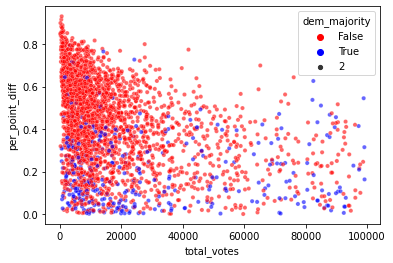

In [7]:
splot = sns.scatterplot(x='total_votes', y='per_point_diff',
                        hue="dem_majority",                     
                        data=election_data_cleaned_df[votes_undermill],           
                        palette=['red', 'blue'],
                        alpha=0.6,
                        size=2)

<AxesSubplot:>

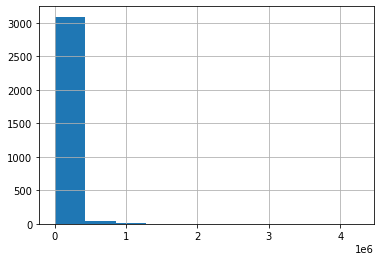

In [8]:
election_data_cleaned_df['total_votes'].hist()

In [9]:
total_votes_bystate = election_data_cleaned_df.groupby('state_name')['total_votes'].sum()

In [10]:
total_votes_bystate

state_name
Alabama                  2323304
Alaska                    391346
Arizona                  3387326
Arkansas                 1219069
California              17495906
Colorado                 3256953
Connecticut              1824280
Delaware                  504010
District of Columbia      344356
Florida                 11067456
Georgia                  4997716
Hawaii                    574469
Idaho                     868105
Illinois                 6038850
Indiana                  3033198
Iowa                     1690871
Kansas                   1349567
Kentucky                 2136768
Louisiana                2148062
Maine                     813740
Maryland                 3037030
Massachusetts            3631402
Michigan                 5539302
Minnesota                3277171
Mississippi              1315178
Missouri                 3025962
Montana                   605750
Nebraska                  956379
Nevada                   1405376
New Hampshire             804430

In [11]:
#election_data_cleaned_df=election_data_cleaned_df.set_index('state_name')
election_data_cleaned_df['state_proportion']=election_data_cleaned_df['total_votes']/total_votes_bystate

In [12]:
election_data_cleaned_df

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,dem_majority,state_proportion
0,Alabama,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,False,NaN
1,Alabama,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,False,NaN
2,Alabama,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,False,NaN
3,Alabama,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,False,NaN
4,Alabama,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3147,Wyoming,Sweetwater County,12229,3823,16603,8406,0.736554,0.230260,0.506294,False,NaN
3148,Wyoming,Teton County,4341,9848,14677,-5507,0.295769,0.670982,0.375213,True,NaN
3149,Wyoming,Uinta County,7496,1591,9402,5905,0.797277,0.169219,0.628058,False,NaN
3150,Wyoming,Washakie County,3245,651,4012,2594,0.808824,0.162263,0.646560,False,NaN


In [13]:
election_data_cleaned_df.groupby(election_data_cleaned_df.index)['state_proportion'].sum()

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3147    0.0
3148    0.0
3149    0.0
3150    0.0
3151    0.0
Name: state_proportion, Length: 3152, dtype: float64

In [14]:
election_data_cleaned_df.to_csv(r'../data/election_clean.csv', index = False)

<div class="alert alert-warning">
    
### Plotting data on map
    
</div>

In [15]:
# load geojson file into a GeoDataFrame
us_county_gdf = gpd.read_file('../data/us_counties_albers.geojson')

In [16]:
us_county_gdf.shape

(3143, 10)

* each row is a county

In [17]:
us_county_gdf.head()

,id,fips,state_fips,county_fips,name,lsad,census_area,state,iso_3166_2,geometry
0,0,01001,01,001,Autauga,County,594.436,Alabama,AL,"POLYGON ((-86.49415 32.34372, -86.71953 32.404..."
1,1,01009,01,009,Blount,County,644.776,Alabama,AL,"POLYGON ((-86.57506 33.76425, -86.75998 33.841..."
2,2,01017,01,017,Chambers,County,596.531,Alabama,AL,"POLYGON ((-85.18234 32.86995, -85.12455 32.772..."
3,3,01021,01,021,Chilton,County,692.854,Alabama,AL,"POLYGON ((-86.51727 33.01948, -86.51727 32.930..."
4,4,01033,01,033,Colbert,County,592.619,Alabama,AL,"POLYGON ((-88.14114 34.58091, -88.14114 34.586..."


* FIPS codes and county name and state name can be used to merge with other data frames

<AxesSubplot:>

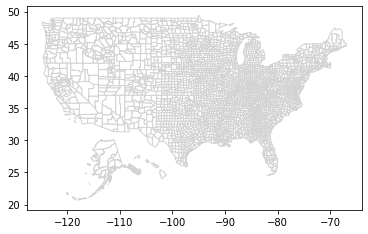

In [18]:
# use geometry column to plot outline of counties
us_county_gdf.plot(color='white', edgecolor='lightgray')

### Merge election data with map data

* `election_data_cleaned_df` doesn't include FIPS codes so need to use
   * `state_name`
   * `county_name`

In [19]:
election_data_cleaned_df.head()

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,dem_majority,state_proportion
0,Alabama,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,False,NaN
1,Alabama,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,False,NaN
2,Alabama,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,False,NaN
3,Alabama,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,False,NaN
4,Alabama,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,False,NaN


* need to remove the word `County` from the `county_name` column so it will match to the `name` column in `us_county_gdf`

In [20]:
election_data_cleaned_df['county_name']=election_data_df['county_name'].str.replace(' County','')

In [21]:
election_data_gdf = pd.merge(us_county_gdf,
                             election_data_cleaned_df,
                             left_on=['name', 'state'],
                             right_on=['county_name','state_name'])

* we can create a new column with values:
    * `Dem` - if `dem_majority` is True
    * `Rep` - otherwise
    

* using the `np.where(logical_test, val_if_true, val_if_false)` function


* and call the new column `outcome`

In [22]:
election_data_gdf['outcome']=np.where(election_data_gdf['dem_majority'], 'Dem', 'Rep')

* Now let's plot this categorical variable

<AxesSubplot:>

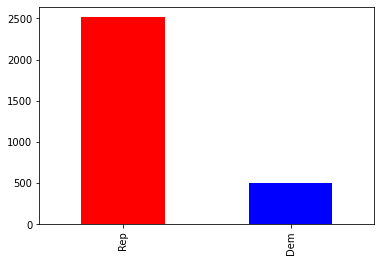

In [67]:
election_data_gdf['outcome'].value_counts().plot(kind='bar', color=['r','b'])

* on a map at the county level

<AxesSubplot:>

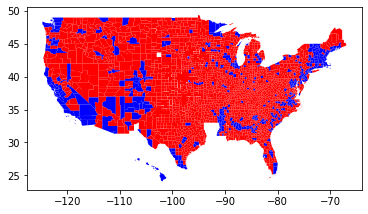

In [23]:
election_data_gdf.plot(column='outcome',
                       cmap='bwr'
                      )

#### Plotting the `per_point_diff`

* A boxplot is a good choice to look at the distribution of a continue variable like `per_point_diff` by category, here `outcome`

<AxesSubplot:xlabel='outcome', ylabel='per_point_diff'>

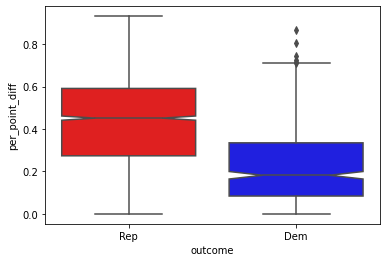

In [82]:
sns.boxplot(x='outcome', y='per_point_diff', 
            data=election_data_gdf,
            palette={'Rep': '#ff0000',
                     'Dem': '#0000ff' },
            notch=True
           )

* This more clearly illustrates what you were trying to get at with the scatter plot above I think. For the counties won by Republicans there was a large point difference that for those won by Democrats.


* For a map plot, instead of a categorical plot we could use the `per_point_diff` column combined with the outcome column to create minues values for Dem and positive values for Rep.

In [24]:
election_data_gdf['per_point_diff_outcome']=election_data_gdf['per_point_diff'] * np.where(election_data_gdf['outcome']=='Dem', -1, 1)

# show new variable
election_data_gdf[['outcome', 'per_point_diff_outcome']].sample(10)

,outcome,per_point_diff_outcome
885,Rep,0.416667
2007,Rep,0.565269
2301,Rep,0.080832
1908,Dem,-0.471327
1459,Rep,0.782496
596,Rep,0.328213
339,Rep,0.321171
2417,Rep,0.464324
2609,Rep,0.392674
2222,Rep,0.301959


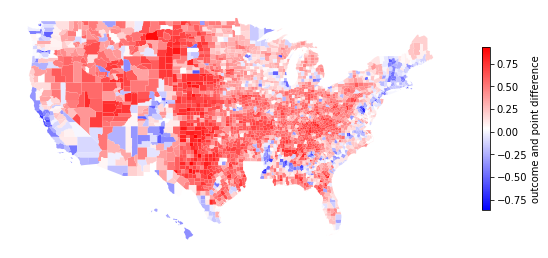

In [25]:
election_data_gdf.plot(column='per_point_diff_outcome',
                       cmap='bwr', legend=True,
                       figsize=(10,10),
                       legend_kwds={'shrink': 0.3,
                                    'label': 'outcome and point difference'}
                      )
plt.axis('off')
plt.show()

* This seems to illustrate some interesting patterns and combines outcome and strength that outcome


* However, the `bwr` colormap (sounds for `blue-white-red`) points values close to 0 in the white color band which means we lose the outcome (blue or red).


* There isn't a predefined 'BlueRed' colormap but we can define one
    * It requires some `matplotlib` functions and a change to the plotting

In [58]:
# define a colormap that goes from Blue (b) to Red (r)
cm1 = mcol.LinearSegmentedColormap.from_list("BlueRed",["b","r"])

# normalize the scale from -1 to 1 to match the per_point_diff_outcome column
cnorm = mcol.Normalize(vmin=-1,vmax=1)

# create a cmap object we can pass values to
cpick = cm.ScalarMappable(norm=cnorm,cmap=cm1)

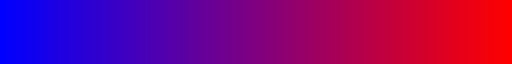

In [62]:
# look at our color map
cm1

* now we can plot the `per_point_diff_outcome` variable onto the county map

* instead of the `column` argument we have to pass a color for each row by using the `cpick` colormap object

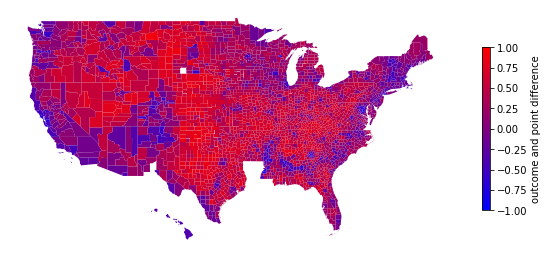

In [61]:
election_data_gdf.plot(color=cpick.to_rgba(election_data_gdf['per_point_diff_outcome']),
                       figsize=(10,10))
                       
plt.axis('off')
plt.colorbar(cpick, shrink=0.3,
             label='outcome and point difference')

plt.show()

* TBH I am not sure this communicates any better but it does have the advantage of keeping the outcome clearly visible. But it makes the point difference less obvious. Purple means low point difference with either a red or blue outcome. Whereas in the previous version this was the white band of colors.
